In [1]:
import pandas as pd

# Load the data
control = pd.read_csv("ga4_detailed_event_report_1.csv")
treatment = pd.read_csv("ga4_detailed_event_report_2.csv")

# Show the basic structure
print("Control (no tutorial):", control.shape)
print("Treatment (with tutorial):", treatment.shape)

# Peek at the data
control.head()


Control (no tutorial): (253, 12)
Treatment (with tutorial): (249, 12)


,eventName,date,city,country,deviceCategory,browser,sessionSourceMedium,pagePath,eventCount,userEngagementDuration,engagedSessions,screenPageViews
0,Tab Viewed,20250415,New York,United States,desktop,Chrome,(direct) / (none),/app_old/,34,1,8,0
1,page_view,20250412,Fort Lee,United States,desktop,Chrome,(direct) / (none),/,28,0,5,28
2,user_engagement,20250412,Fort Lee,United States,desktop,Chrome,(direct) / (none),/,27,371,5,0
3,Tab Duration,20250415,New York,United States,desktop,Chrome,(direct) / (none),/app_old/,23,67,4,0
4,scroll,20250412,Fort Lee,United States,desktop,Chrome,(direct) / (none),/,14,73,5,0


                 Control  Treatment
eventName                          
Click                 45        109
Page Leave            29         34
Tab Duration          85        127
Tab Viewed           146        213
click                  1          0
first_visit           60         54
form_start            11         17
page_view            101         97
scroll                54         57
session_start         73         68
user_engagement       30          5


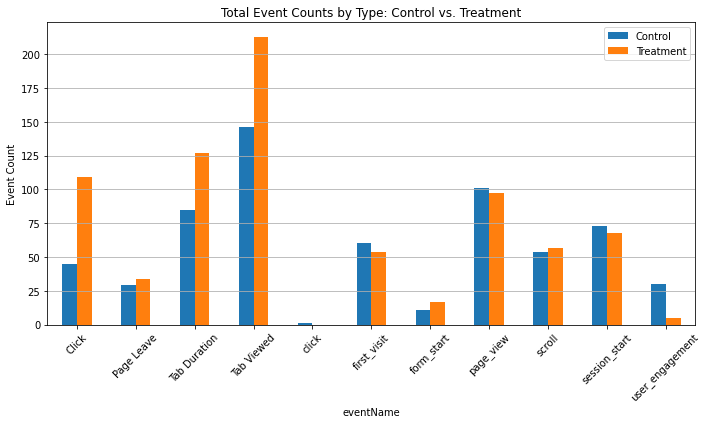

In [ ]:
import matplotlib.pyplot as plt

# Count total number of events by type
control_event_counts = control.groupby("eventName")["eventCount"].sum().sort_values(ascending=False)
treatment_event_counts = treatment.groupby("eventName")["eventCount"].sum().sort_values(ascending=False)

# Combine into a single dataframe for side-by-side comparison
event_comparison = pd.DataFrame({
    "Control": control_event_counts,
    "Treatment": treatment_event_cosunts
}).fillna(0).astype(int)

# Display the table
print(event_comparison)

# Plot
event_comparison.plot(kind="bar", figsize=(10, 6))
plt.title("Total Event Counts by Type: Control vs. Treatment")
plt.ylabel("Event Count")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


In [3]:
# Define metrics of interest
task_events = ["Apply Numeric", "Clean Data"]
bounce_events = ["Page Leave"]
exploration_events = ["Switch Tab"]
tutorial_events = ["Start Tutorial", "Skip Tutorial"]  # Only in treatment

# Helper function to sum counts for a list of events
def sum_events(df, event_list):
    return df[df["eventName"].isin(event_list)] \
             .groupby("eventName")["eventCount"] \
             .sum().to_dict()

# Apply to both groups
control_metrics = {
    "Task Completion": sum(sum_events(control, task_events).values()),
    "Page Leaves": sum(sum_events(control, bounce_events).values()),
    "Tab Switches": sum(sum_events(control, exploration_events).values()),
    "Tutorial Starts": 0,  # Doesn't exist in control
    "Tutorial Skips": 0
}

treatment_metrics = {
    "Task Completion": sum(sum_events(treatment, task_events).values()),
    "Page Leaves": sum(sum_events(treatment, bounce_events).values()),
    "Tab Switches": sum(sum_events(treatment, exploration_events).values()),
    "Tutorial Starts": sum(sum_events(treatment, ["Start Tutorial"]).values()),
    "Tutorial Skips": sum(sum_events(treatment, ["Skip Tutorial"]).values()),
}

# Combine into a dataframe for comparison
import pandas as pd

metrics_df = pd.DataFrame([control_metrics, treatment_metrics], index=["Control", "Treatment"])
print(metrics_df)


           Task Completion  Page Leaves  Tab Switches  Tutorial Starts  \
Control                  0           29             0                0   
Treatment                0           34             0                0   

           Tutorial Skips  
Control                 0  
Treatment               0  
